# Problem 1

## Problem Description
In this problem you will create your own neural network to fit a function with two input features $x_0$ and $x_1$, and predict the output, $y$. The structure of your neural network is up to you, but you must describe the structure of your network, training parameters, and report an MSE for your fitted model on the provided data.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

- Visualization of provided data
- Visualization of trained model with provided data
- Trained model MSE
- Discussion of model structure and training parameters

#### Imports and Utility Functions:

In [1]:
import torch
import torch.nn as nn
from torch import optim, nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

def dataGen():
    # Set random seed so generated random numbers are always the same
    gen = np.random.RandomState(0)
    # Generate x0 and x1
    x = 2*(gen.rand(200,2)-0.5)
    # Generate y with x0^2 - 0.2*x1^4 + x0*x1 + noise
    y = x[:,0]**2 - 0.2*x[:,1]**4 + x[:,0]*x[:,1] + 0.4*(gen.rand(len(x))-0.5)
    
    return x, y

def visualizeModel(model):
    # Get data
    x, y = dataGen()
    # Number of data points in meshgrid
    n = 25
    # Set up evaluation grid
    x0 = torch.linspace(min(x[:,0]),max(x[:,0]),n)
    x1 = torch.linspace(min(x[:,1]),max(x[:,1]),n)
    X0, X1 = torch.meshgrid(x0, x1, indexing = 'ij')
    Xgrid = torch.vstack((X0.flatten(),X1.flatten())).T
    Ypred = model(Xgrid).reshape(n,n)
    # 3D plot
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    # Plot data
    ax.scatter(x[:,0],x[:,1],y, c = y, cmap = 'viridis')
    # Plot model
    ax.plot_surface(X0.detach().numpy(),X1.detach().numpy(),Ypred.detach().numpy(), color = 'gray', alpha = 0.25)
    ax.plot_wireframe(X0.detach().numpy(),X1.detach().numpy(),Ypred.detach().numpy(),color = 'black', alpha = 0.25)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.set_zlabel('$y$')
    plt.show()

## Generate and visualize the data
Use the `dataGen()` function to generate the x and y data, then visualize with a 3D scatter plot.

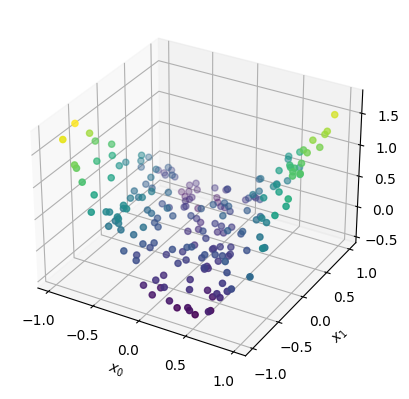

In [2]:
x, y = dataGen()

fig,ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x[:,0],x[:,1],y, c = y, cmap = 'viridis')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$y$')
plt.show()

## Create and train a neural network using PyTorch
Choice of structure and training parameters are entirely up to you, however you will need to provide reasoning for your choices. An MSE smaller than 0.02 is reasonable. 

Epoch 0 of 1500... 	Average loss: 0.40396177768707275
Epoch 60 of 1500... 	Average loss: 0.16132377088069916
Epoch 120 of 1500... 	Average loss: 0.02841203287243843
Epoch 180 of 1500... 	Average loss: 0.016156360507011414
Epoch 240 of 1500... 	Average loss: 0.014165695756673813
Epoch 300 of 1500... 	Average loss: 0.013476306572556496
Epoch 360 of 1500... 	Average loss: 0.013207373209297657
Epoch 420 of 1500... 	Average loss: 0.013016367331147194
Epoch 480 of 1500... 	Average loss: 0.012853248976171017
Epoch 540 of 1500... 	Average loss: 0.012704039923846722
Epoch 600 of 1500... 	Average loss: 0.012557604350149632
Epoch 660 of 1500... 	Average loss: 0.012407958507537842
Epoch 720 of 1500... 	Average loss: 0.012280775234103203
Epoch 780 of 1500... 	Average loss: 0.01217031478881836
Epoch 840 of 1500... 	Average loss: 0.012086634524166584
Epoch 900 of 1500... 	Average loss: 0.01201742421835661
Epoch 960 of 1500... 	Average loss: 0.012036304920911789
Epoch 1020 of 1500... 	Average loss: 0.

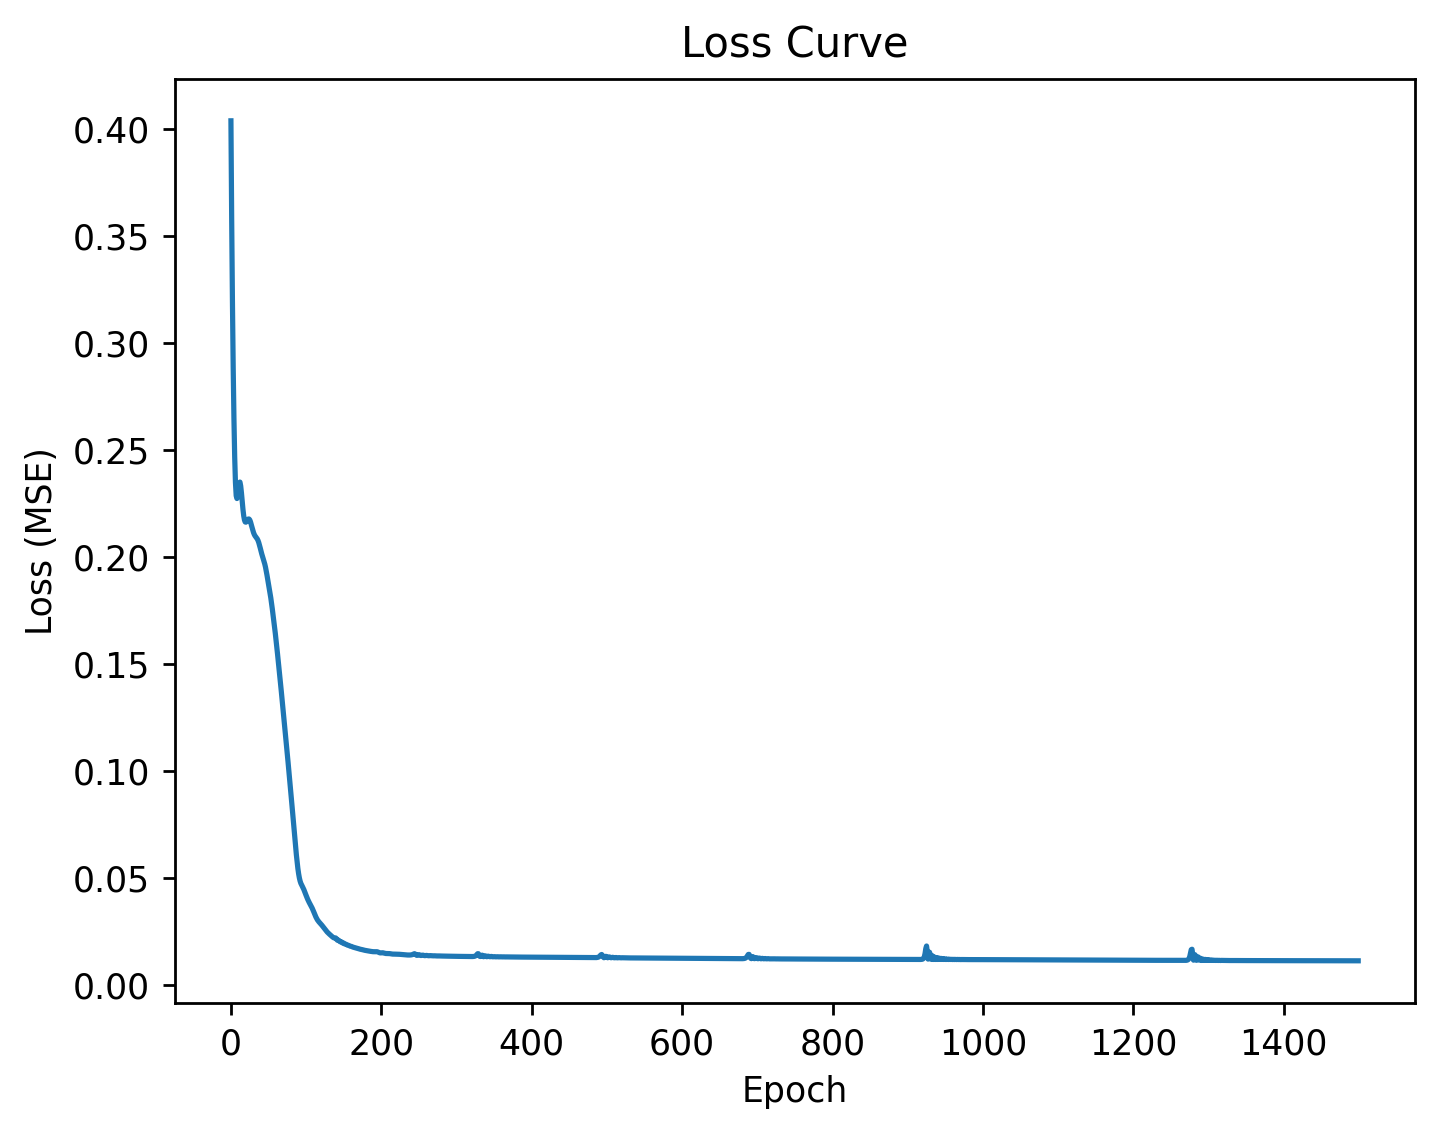

In [3]:
class NNet(nn.Module):
    def __init__(self, N_hidden=6, N_in=2, N_out=1, activation = F.relu):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(N_in, N_hidden),
            nn.Tanh(),
            nn.Linear(N_hidden, N_hidden),
            nn.Tanh(),
            nn.Linear(N_hidden, N_hidden),
            nn.Tanh(),
            nn.Linear(N_hidden, N_hidden),
            nn.Tanh(),
            nn.Linear(N_hidden, N_out)
        )

    def forward(self,x):
        return self.seq(x)
    
x = torch.Tensor(x)
y = torch.Tensor(y.reshape(-1,1))
    
model = NNet(N_hidden = 10)
loss_curve = []

lr = 0.005
epochs = 1500
loss_fcn = nn.MSELoss()

opt = optim.Adam(params = model.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    out = model(x) # Evaluate the model
    loss = loss_fcn(out,y)

    loss_curve.append(loss.item())

    # Print loss progress info 25 times during training
    if epoch % int(epochs / 25) == 0:
        print(f"Epoch {epoch} of {epochs}... \tAverage loss: {loss.item()}")

    opt.zero_grad()
    loss.backward()
    opt.step()

plt.figure(dpi=250)
plt.plot(loss_curve)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.show()

## Visualize your trained model
Use the provided `visualizeModel()` function by passing in your trained model to see your models predicted function compared to the provided data

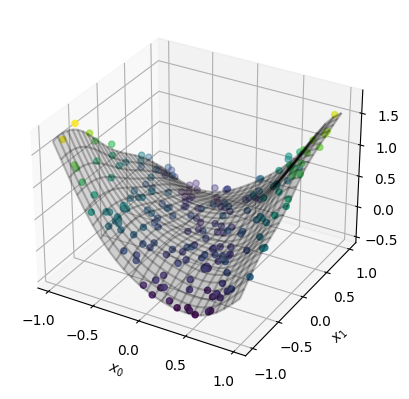

In [4]:
visualizeModel(model)

## Discussion
Report the MSE of your trained model on the generated data. Discuss the structure of your network, including the number and size of hidden layers, choice of activation function, loss function, optimizer, learning rate, number of training epochs.

Final MSE: 0.011418207548558712

The number of nodes per layer was chosen by increasing the number until there wasn't a significant increase in performance. With this, the lowest number of nodes per layer was chosen to ensure faster training. A similar logic was applied to chosing the number of hidden layers. I went with 5 hidden layers to improve the accuracy of the fit without overfitting choosing a higher number like 10 or 15. In addition, 5 seemed to produce the best results. Tanh was chosen as an activation function because it has a fast convergence with low loss. It also produced smoother results in the output because of it's continuous nature as compared to relu. The mse loss function was used because it is a pretty standard mse function for regression problems like this one. It provides an overview of how well our network approximates as a function the data which is exactly what we are trying to accomplish with this regression problem. The Adam optimizer was chosen to hopefully help improve the speed of training. Since the learning rate dynamically adjusts, the hope was that it would produce a more accurate result than traditional stochastic gradient descent and also take more optimal steps to get there. The learning rate was chosen after a few iterations to optimize the speed of training while also reducing the final loss as much as possible. Number of epochs was chosen because it reduced the loss function to a point where it wouldn't reduce by a significant enough factor if training continued.